# DS-HW[4] Data Analysis

## Problem 1. Analysis Model Generation

In [29]:
import pandas as pd
import warnings
pd.set_option('mode.chained_assignment', None)
warnings.filterwarnings(action='ignore')


In [30]:
data= pd.read_csv('/Users/kimdaehun/Desktop/dataset/source.csv')
data

,motion_idx,tick,ang_j3,ang_j4,ang_j5,temp_j3,temp_j4,temp_j5,motion_id
0,3086,160049320050,-0.554516,-0.009215,1.35619,34.0,41.0,42.0,4
1,3086,160049320051,-0.554516,-0.009215,1.35619,34.0,41.0,42.0,4
2,3086,160049320053,-0.554516,-0.009215,1.35619,34.0,41.0,42.0,4
3,3086,160049320054,-0.554516,-0.009215,1.35619,34.0,41.0,42.0,4
4,3086,160049320056,-0.554516,-0.009215,1.35619,34.0,41.0,42.0,4
...,...,...,...,...,...,...,...,...,...
1649291,74365,160181787681,-0.715585,0.428513,1.50056,45.0,57.0,53.0,30
1649292,74365,160181787681,-0.715585,0.428513,1.50056,45.0,57.0,53.0,30
1649293,74365,160181787681,-0.715585,0.428513,1.50056,45.0,57.0,53.0,30
1649294,74365,160181787681,-0.715585,0.428513,1.50056,45.0,57.0,53.0,30


데이터를 불러온다.

In [31]:
data_set= data.groupby('motion_idx').mean()
data_set
data_set=pd.DataFrame(data_set)
real_data=data_set.drop(labels='tick',axis=1)
real_data

,ang_j3,ang_j4,ang_j5,temp_j3,temp_j4,temp_j5,motion_id
motion_idx,,,,,,,
3086,-0.696566,0.224850,1.468453,35.814570,41.264901,42.0,4.0
3093,-0.686167,0.210258,1.461789,39.870968,47.000000,45.0,4.0
3100,-0.697572,0.225267,1.468269,38.831081,48.567568,46.0,4.0
3107,-0.692551,0.225480,1.470367,41.589744,49.000000,46.0,4.0
3114,-0.681657,0.201416,1.457061,40.683824,50.000000,47.0,4.0
...,...,...,...,...,...,...,...
74321,-0.762141,0.286843,1.514234,48.428816,57.000000,53.0,30.0
74332,-0.758629,0.296517,1.513652,45.180243,57.000000,52.0,30.0
74343,-0.763679,0.280751,1.516581,43.494792,57.000000,53.0,30.0


모션 인덱스 별로 틱이 여러개 존재하기 떄문에, 일단 모션 인덱스별로 데이터 들을 평균을 나눠 모션 인덱스 별로 한개의 인덱스만 존재하게 하였다. 이를 위해 groupby()를 사용했고, 차후 문제 해결을 위해 필요없다고 생각 되는 tick 을 드랍 해버린다.

In [32]:
data1=real_data.drop(labels=['temp_j3','temp_j4','temp_j5'], axis=1)
data1

,ang_j3,ang_j4,ang_j5,motion_id
motion_idx,,,,
3086,-0.696566,0.224850,1.468453,4.0
3093,-0.686167,0.210258,1.461789,4.0
3100,-0.697572,0.225267,1.468269,4.0
3107,-0.692551,0.225480,1.470367,4.0
3114,-0.681657,0.201416,1.457061,4.0
...,...,...,...,...
74321,-0.762141,0.286843,1.514234,30.0
74332,-0.758629,0.296517,1.513652,30.0
74343,-0.763679,0.280751,1.516581,30.0


k-means clustering에 ang 을 쓰기 위해 temp 열들을 drop 시킨다.

#### 1) Perform K-means Clustering by calculating the average value of motion units for angles.

In [33]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

-1.016281756097561 -0.16949487170731709 1.3277667721518989
-0.5960124301075269 0.3207638555926544 1.6125946196660481


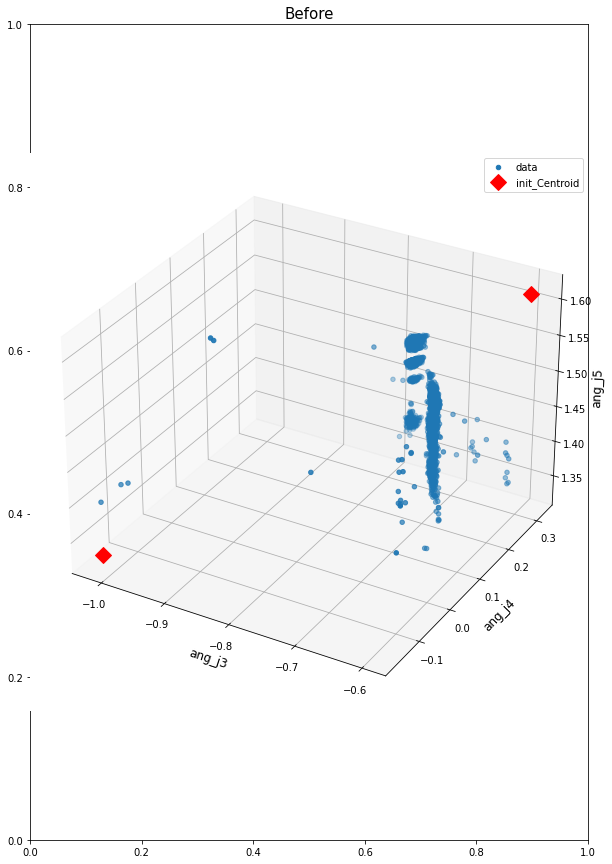

In [34]:

x1,y1,z1 = data1['ang_j3'][:].min(),data1['ang_j4'][:].min(),data1['ang_j5'][:].min()
x2,y2,z2 = data1['ang_j3'][:].max(),data1['ang_j4'][:].max(),data1['ang_j5'][:].max()
print(x1,y1,z1)
print(x2,y2,z2)
figure=plt.figure(figsize=(10,15))
plt.title("Before", fontsize=15)
ax= figure.add_subplot(111,projection='3d')
ax.scatter(data1["ang_j3"],data1["ang_j4"],data1["ang_j5"],"o",label='data')
plt.plot([x1,x2], [y1,y2], [z1,z2] ,"rD", markersize=12, label='init_Centroid')
plt.xlabel("ang_j3",fontsize=12)
plt.ylabel("ang_j4",fontsize=12)
ax.set_zlabel("ang_j5",fontsize=12)
plt.legend()
plt.grid()
plt.show()

ang_j3, ang_j4, ang_j5를 각각 x,y,z축으로 해서 데이터를 plotting 해보았다. 추가적으로 실습 처럼 initial Centroid를 추가 할 건데, initial centroid 위치는 강의에서 배웠듯이 좌표의 끝과 끝에서 시작하고자
 x1,y1,z1 = data1['ang_j3'][:].min(),data1['ang_j4'][:].min(),data1['ang_j5'][:].min()
x2,y2,z2 = data1['ang_j3'][:].max(),data1['ang_j4'][:].max(),data1['ang_j5'][:].max() 를 활용해 최소값이 있는 위치 와, 최대값이 있는 위치에 plotting 시켰다.

In [35]:
data1=real_data.drop(labels=['temp_j3','temp_j4','temp_j5','motion_id'], axis=1)
data1[['ang_j3','ang_j4','ang_j5']]

,ang_j3,ang_j4,ang_j5
motion_idx,,,
3086,-0.696566,0.224850,1.468453
3093,-0.686167,0.210258,1.461789
3100,-0.697572,0.225267,1.468269
3107,-0.692551,0.225480,1.470367
3114,-0.681657,0.201416,1.457061
...,...,...,...
74321,-0.762141,0.286843,1.514234
74332,-0.758629,0.296517,1.513652
74343,-0.763679,0.280751,1.516581


데이터 활용을 위한 파싱

In [36]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, init=np.array([(x1,y1,z1),(x2,y2,z2)])).fit(data1[['ang_j3','ang_j4','ang_j5']])
data1['cluster'] = kmeans.labels_
final_centroid = kmeans.cluster_centers_

data1


,ang_j3,ang_j4,ang_j5,cluster
motion_idx,,,,
3086,-0.696566,0.224850,1.468453,0
3093,-0.686167,0.210258,1.461789,0
3100,-0.697572,0.225267,1.468269,0
3107,-0.692551,0.225480,1.470367,0
3114,-0.681657,0.201416,1.457061,0
...,...,...,...,...
74321,-0.762141,0.286843,1.514234,1
74332,-0.758629,0.296517,1.513652,1
74343,-0.763679,0.280751,1.516581,1


sklearn.cluster를 활용해 initial centroid를 기반으로 cluster는 2, K=2로 하여 클러스터링을 진행했다. 클러스터링한 결과는 cluster 열이 새로 생기며 저장되었다.

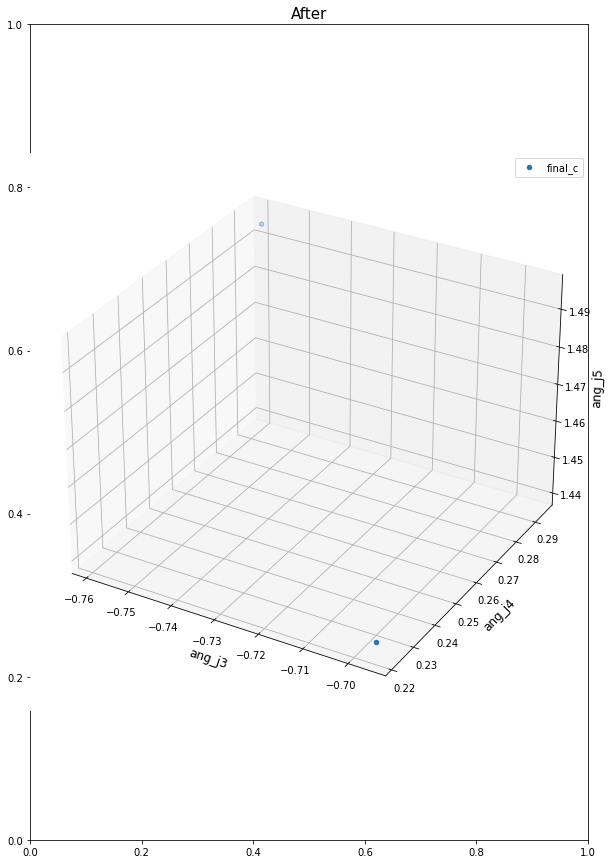

In [37]:
figure=plt.figure(figsize=(10,15))
plt.title("After", fontsize=15)
ax= figure.add_subplot(111,projection='3d')
ax.scatter(final_centroid[:,0], final_centroid[:,1], final_centroid[:,2], "rD",label='final_c')
plt.xlabel("ang_j3", fontsize=12)
plt.ylabel("ang_j4", fontsize=12)
ax.set_zlabel("ang_j5",fontsize=12)
plt.legend()
plt.grid()
plt.show()

다음 결과는 클러스터링 진행 후 final centroid를 plot 한 것이고, 위치가 처음과 비교했을 때 변경된 것을 알 수 있다.

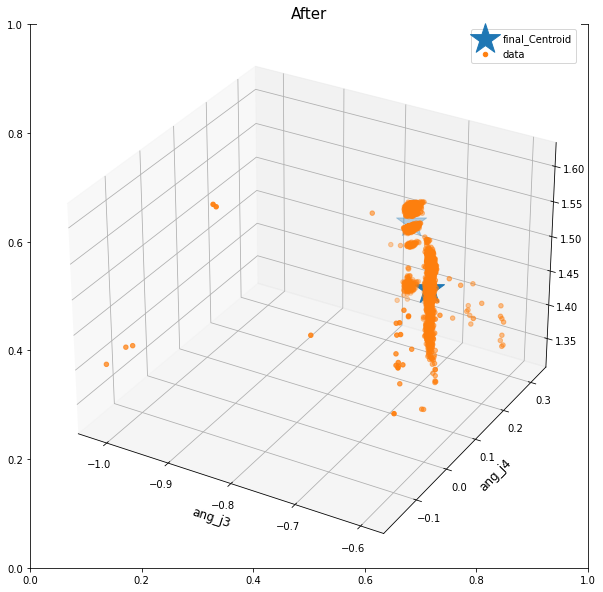

In [38]:
figure= plt.figure(figsize=(10,10))
plt.title("After", fontsize=15)
ax= figure.add_subplot(111,projection='3d')
ax.scatter(final_centroid[:,0], final_centroid[:,1], final_centroid[:,2],marker="*", label='final_Centroid',s=1000)
ax.scatter(data1["ang_j3"],data1["ang_j4"],data1["ang_j5"],"o",label='data')
plt.xlabel("ang_j3", fontsize=12)
plt.ylabel("ang_j4", fontsize=12)
plt.legend()
plt.grid()
plt.show()

기존 데이터들과 final centroid를 같이 plotting 한 것이다. 데이터 사이에 final_centroid가 숨어있어 잘 보이지 않아 size 조절을 통해서 다음과 같이 별 표시로 나타 내었고, 적절한 위치에 cluster가 형성되어 있는 것을 확인할 수 있다.

#### 2) Perform DBSCAN by calculating the average value of motion units for angles.

In [39]:
'''Density-based spatial clustering of applications with noise'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

real_data

,ang_j3,ang_j4,ang_j5,temp_j3,temp_j4,temp_j5,motion_id
motion_idx,,,,,,,
3086,-0.696566,0.224850,1.468453,35.814570,41.264901,42.0,4.0
3093,-0.686167,0.210258,1.461789,39.870968,47.000000,45.0,4.0
3100,-0.697572,0.225267,1.468269,38.831081,48.567568,46.0,4.0
3107,-0.692551,0.225480,1.470367,41.589744,49.000000,46.0,4.0
3114,-0.681657,0.201416,1.457061,40.683824,50.000000,47.0,4.0
...,...,...,...,...,...,...,...
74321,-0.762141,0.286843,1.514234,48.428816,57.000000,53.0,30.0
74332,-0.758629,0.296517,1.513652,45.180243,57.000000,52.0,30.0
74343,-0.763679,0.280751,1.516581,43.494792,57.000000,53.0,30.0


데이터 불러오기

In [40]:
data1=real_data.drop(labels=['temp_j3','temp_j4','temp_j5','motion_id'], axis=1)

데이터 활용을 위한 데이터 열 파싱

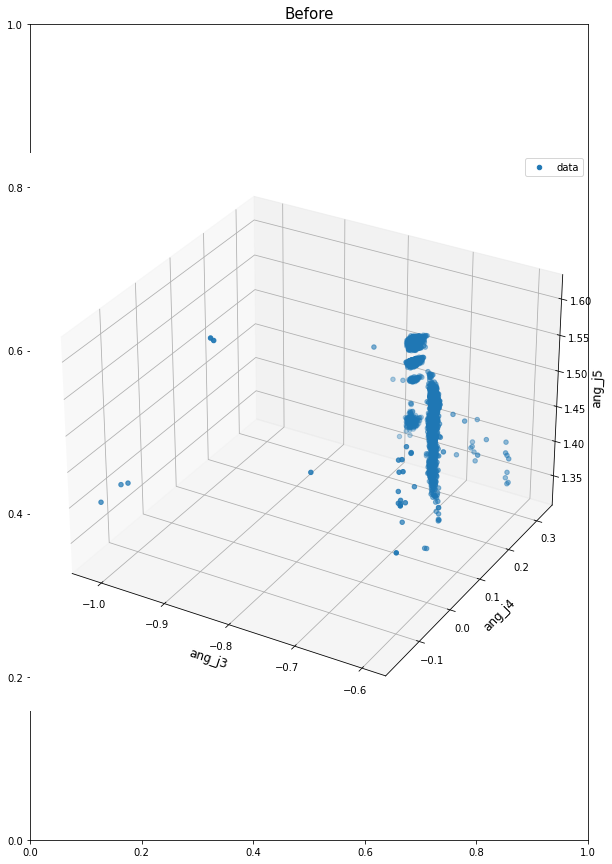

In [41]:

figure=plt.figure(figsize=(10,15))
plt.title("Before", fontsize=15)
ax= figure.add_subplot(111,projection='3d')
ax.scatter(data1["ang_j3"],data1["ang_j4"],data1["ang_j5"],"o",label='data')
plt.xlabel("ang_j3",fontsize=12)
plt.ylabel("ang_j4",fontsize=12)
ax.set_zlabel("ang_j5",fontsize=12)
plt.legend()
plt.grid()
plt.show()

1)에서 진행했던 것 처럼 ang_j3, ang_j4, ang_j5를 x,y,z 축으로 하여 3차원 plotting을 진행하였다.

In [111]:
from sklearn.cluster import DBSCAN
db_scan = DBSCAN(eps=0.0084, min_samples=100).fit(data1[['ang_j3','ang_j4','ang_j5']])
data1['cluster_db'] = db_scan.labels_


이번에도 1)의 진행과정과 비슷하다. 하지만 이번에는 initial centroid와 k를 지정해 주지 않고, eps 와 min_samples를 통해 토대로 ang 데이터의 클러스터링을 진행했다. 마찬가지로 cluster_db를 만들어 결과를 데이터 프레임에 라벨링 하였다. 추가적으로 eps 같은 경우, 하나의 개체를 중심으로 eps 거리 내 몇개의 점이 있는지 파악하는 것이고, min_samples같은 경우, 군집을 이루기 위해 필요한 최소한의 개체 수이다. eps 거리 내에 min_samples만큼의 점이 있으면 군집이라고 판단된다.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Estimated number of clusters: 5
Estimated number of noise points: 630


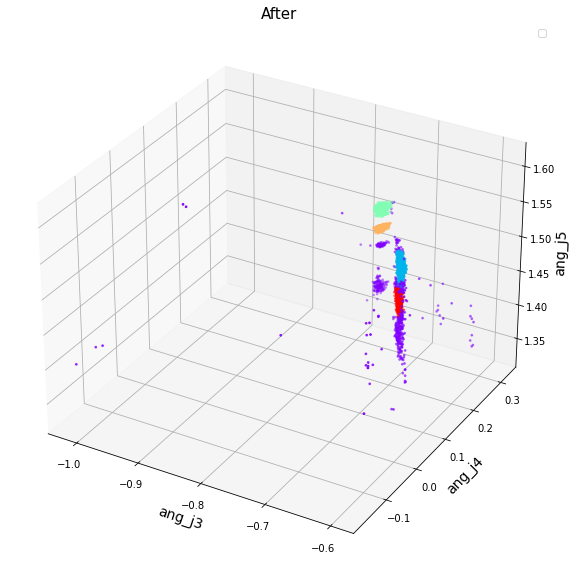

In [112]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

plt.title("After", fontsize=15)
ax.set_xlabel('ang_j3', size = 14)
ax.set_ylabel('ang_j4', size = 14)
ax.set_zlabel('ang_j5', size = 14)
ax.scatter(data1['ang_j3'],data1['ang_j4'],data1['ang_j5'], c=data1['cluster_db'], marker='.', s=12, cmap = "rainbow")
plt.legend()


n_clusters_ = len(set(data1['cluster_db'])) - (1 if -1 in data1['cluster_db'] else 0)
n_noise_ = list(data1['cluster_db']).count(-1)


print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

다음은 db scan 이후 나뉜 군집을 plotting한 것이다 군집 별로 색이 다른 것을 확인할 수 있고, 
n_clusters_ = len(set(data1['cluster_db'])) - (1 if -1 in data1['cluster_db'] else 0)
n_noise_ = list(data1['cluster_db']).count(-1) 를 통해서 클러스터의 갯수, 그리고 noise의 갯수를 추가적으로 파악해 보았다.

In [113]:
data1['cluster_db'].value_counts()

 1    847
 0    786
-1    630
 2    441
 3    434
Name: cluster_db, dtype: int64

다음은 cluster_db 내 값들의 갯수, 즉 클러스터 별로 몇개씩 데이터가 들어가 있는지 확인한 것이다. min_samples의 값을 임의로 100으로 잡았는데, 다음을 보고 최대한 균일하게 각 클러스터 별로 데이터가 들어가도록 eps를 조정해본 결과, 0.0084일 때 가장 클러스터가 많으면서 클러스터 별로 들어있는 데이터의 갯수가 가장 균일했다. 따라서 다음과 같은 근거를 들어 eps를 fix해 최종적인 dbscan의 클러스터를 결정하였다. 

#### 3) Perform k-NN by calculating the average value of motion unit for each angle.

In [154]:

real_data= pd.read_csv("dataset/source.csv").groupby("motion_idx", as_index=False).mean()
columns = real_data.columns



In [155]:
real4= real_data[real_data['motion_id']==4]
real4


,motion_idx,tick,ang_j3,ang_j4,ang_j5,temp_j3,temp_j4,temp_j5,motion_id
0,3086,1.600493e+11,-0.696566,0.224850,1.468453,35.814570,41.264901,42.0,4.0
1,3093,1.600493e+11,-0.686167,0.210258,1.461789,39.870968,47.000000,45.0,4.0
2,3100,1.600493e+11,-0.697572,0.225267,1.468269,38.831081,48.567568,46.0,4.0
3,3107,1.600493e+11,-0.692551,0.225480,1.470367,41.589744,49.000000,46.0,4.0
4,3114,1.600493e+11,-0.681657,0.201416,1.457061,40.683824,50.000000,47.0,4.0
...,...,...,...,...,...,...,...,...,...
3123,74069,1.601817e+11,-0.696014,0.227132,1.470843,46.584416,54.461039,49.0,4.0
3124,74076,1.601817e+11,-0.690662,0.222448,1.467880,46.000000,55.000000,50.0,4.0
3125,74083,1.601817e+11,-0.693003,0.222365,1.468899,45.974026,55.000000,50.0,4.0
3126,74090,1.601817e+11,-0.665363,0.180153,1.448534,45.748327,55.164659,50.0,4.0


In [156]:
real30=real_data[real_data['motion_id']==30]
real30

,motion_idx,tick,ang_j3,ang_j4,ang_j5,temp_j3,temp_j4,temp_j5,motion_id
10,3314,1.600494e+11,-0.760103,0.290500,1.520475,44.981132,55.000000,48.0,30.0
11,3325,1.600494e+11,-0.762754,0.282604,1.522302,44.742857,55.000000,49.0,30.0
12,3336,1.600494e+11,-0.760376,0.289705,1.520608,44.326733,55.000000,49.0,30.0
13,3347,1.600494e+11,-0.759767,0.289390,1.519972,45.945455,55.172727,49.0,30.0
14,3358,1.600494e+11,-0.761415,0.287197,1.521393,44.000000,55.000000,49.0,30.0
...,...,...,...,...,...,...,...,...,...
3133,74321,1.601818e+11,-0.762141,0.286843,1.514234,48.428816,57.000000,53.0,30.0
3134,74332,1.601818e+11,-0.758629,0.296517,1.513652,45.180243,57.000000,52.0,30.0
3135,74343,1.601818e+11,-0.763679,0.280751,1.516581,43.494792,57.000000,53.0,30.0
3136,74354,1.601818e+11,-0.760746,0.287172,1.514902,45.343537,57.000000,53.0,30.0


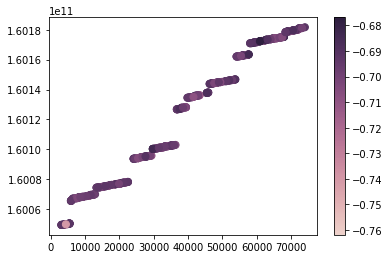

In [206]:
from sklearn.model_selection import train_test_split

X = real4[["motion_idx","tick"]]
X = X.values
y = real4["ang_j3"]
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=5)

knn_model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error
from math import sqrt
train_preds = knn_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse

test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
rmse

import seaborn as sns
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(X_test[:, 0], X_test[:, 1], c=test_preds, s=50, cmap=cmap)
f.colorbar(points)
plt.show()


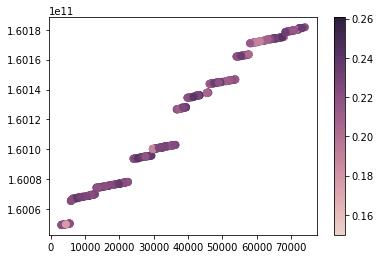

In [194]:
from sklearn.model_selection import train_test_split

X = real4[["motion_idx","tick"]]
X = X.values
y = real4["temp_j4"]
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=5)

knn_model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error
from math import sqrt
train_preds = knn_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse

test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
rmse

import seaborn as sns
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(X_test[:, 0], X_test[:, 1], c=test_preds, s=50, cmap=cmap)
f.colorbar(points)
plt.show()


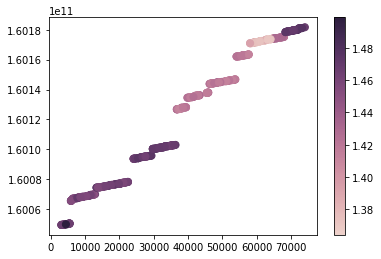

In [195]:
from sklearn.model_selection import train_test_split

X = real4[["motion_idx","tick"]]
X = X.values
y = real4["ang_j5"]
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=5)

knn_model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error
from math import sqrt
train_preds = knn_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse

test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
rmse

import seaborn as sns
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(X_test[:, 0], X_test[:, 1], c=test_preds, s=50, cmap=cmap)
f.colorbar(points)
plt.show()


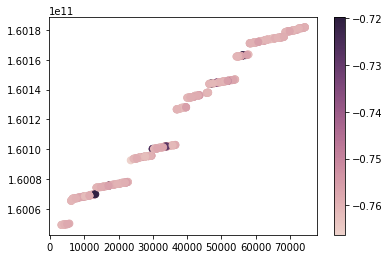

In [201]:
from sklearn.model_selection import train_test_split

X = real30[["motion_idx","tick"]]
X = X.values
y = real30["ang_j3"]
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=4)

knn_model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error
from math import sqrt
train_preds = knn_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse

test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
rmse

import seaborn as sns
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(X_test[:, 0], X_test[:, 1], c=test_preds, s=50, cmap=cmap)
f.colorbar(points)
plt.show()

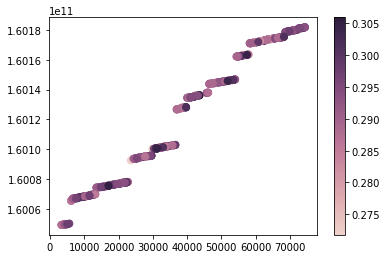

In [200]:
from sklearn.model_selection import train_test_split

X = real30[["motion_idx","tick"]]
X = X.values
y = real30["ang_j4"]
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=4)

knn_model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error
from math import sqrt
train_preds = knn_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse

test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
rmse

import seaborn as sns
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(X_test[:, 0], X_test[:, 1], c=test_preds, s=50, cmap=cmap)
f.colorbar(points)
plt.show()

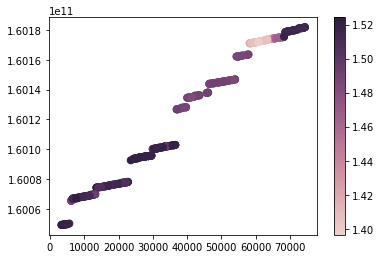

In [199]:
from sklearn.model_selection import train_test_split

X = real30[["motion_idx","tick"]]
X = X.values
y = real30["ang_j5"]
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=4)

knn_model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error
from math import sqrt
train_preds = knn_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse

test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
rmse

import seaborn as sns
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(X_test[:, 0], X_test[:, 1], c=test_preds, s=50, cmap=cmap)
f.colorbar(points)
plt.show()

다음과 같이 모션아이디 4 30 에 따른 ang 3 4 5 를 각각 KNN 알고리즘을 통해 classification한 것이다. 실습을 기반으로 코드를 작성했기 때문에 구현 내용은 같고 x, y 만 다르기 때문에 각각의 코드 분석은 하지 않겠다. 각각 x 를 모션 인덱스와 틱으로 두었고, y 같은 경우 ang의 값을 해놓았다. 팔레트를 통해 확인할 수 있듯이 색깔별로 뭉쳐 있는 것을 확인할 수 있다. 색깔의 범위가 연한색-진한색이 두루두루 한 피겨 창에 나와있는 앵글도 있고, 연한색만 모여잇는 앵글도 존재 하는데, 이를 통해 파악할 수 있는 점은 한 피겨 창에 같은 색들로 구성된 데이터 들이 많을 수록 데이터들의 값이 큰 차이 없이 모여있다는 점을 확인할 수 있다. 따라서 이를 통해 각 모션 별로 앵글축에 따라서 데이터의 분포와 밀집을 파악할 수 있다.

#### 4) Perform a Linear Regression analysis on two motions by selecting one kind of temperature.

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [13]:
Line_data=data.loc[data['motion_idx']==3086]
Line_data

,motion_idx,tick,ang_j3,ang_j4,ang_j5,temp_j3,temp_j4,temp_j5,motion_id
0,3086,160049320050,-0.554516,-0.009215,1.35619,34.0,41.0,42.0,4
1,3086,160049320051,-0.554516,-0.009215,1.35619,34.0,41.0,42.0,4
2,3086,160049320053,-0.554516,-0.009215,1.35619,34.0,41.0,42.0,4
3,3086,160049320054,-0.554516,-0.009215,1.35619,34.0,41.0,42.0,4
4,3086,160049320056,-0.554516,-0.009215,1.35619,34.0,41.0,42.0,4
...,...,...,...,...,...,...,...,...,...
146,3086,160049320242,-0.911062,0.571351,1.63419,36.0,43.0,42.0,4
147,3086,160049320244,-0.911062,0.571351,1.63419,36.0,43.0,42.0,4
148,3086,160049320245,-0.919041,0.572887,1.63572,36.0,43.0,42.0,4
149,3086,160049320246,-0.919041,0.572887,1.63572,36.0,43.0,42.0,4


3086 모션 인덱스 값 추출

In [14]:
Line_data= Line_data.drop(['ang_j3','ang_j5'],axis=1)
Line_data


,motion_idx,tick,ang_j4,temp_j3,temp_j4,temp_j5,motion_id
0,3086,160049320050,-0.009215,34.0,41.0,42.0,4
1,3086,160049320051,-0.009215,34.0,41.0,42.0,4
2,3086,160049320053,-0.009215,34.0,41.0,42.0,4
3,3086,160049320054,-0.009215,34.0,41.0,42.0,4
4,3086,160049320056,-0.009215,34.0,41.0,42.0,4
...,...,...,...,...,...,...,...
146,3086,160049320242,0.571351,36.0,43.0,42.0,4
147,3086,160049320244,0.571351,36.0,43.0,42.0,4
148,3086,160049320245,0.572887,36.0,43.0,42.0,4
149,3086,160049320246,0.572887,36.0,43.0,42.0,4


In [15]:
Line_data=Line_data.drop(['temp_j3','temp_j5'],axis=1)
Line_data

,motion_idx,tick,ang_j4,temp_j4,motion_id
0,3086,160049320050,-0.009215,41.0,4
1,3086,160049320051,-0.009215,41.0,4
2,3086,160049320053,-0.009215,41.0,4
3,3086,160049320054,-0.009215,41.0,4
4,3086,160049320056,-0.009215,41.0,4
...,...,...,...,...,...
146,3086,160049320242,0.571351,43.0,4
147,3086,160049320244,0.571351,43.0,4
148,3086,160049320245,0.572887,43.0,4
149,3086,160049320246,0.572887,43.0,4


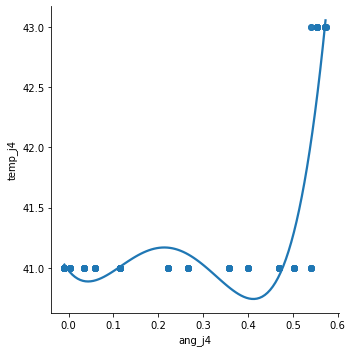

In [117]:
Line_parsing=Line_data.drop(['motion_idx','motion_id'],axis=1)
sns.lmplot(x="ang_j4",y='temp_j4',data=Line_parsing,order=4,ci=None)

lmplot 을 통해 linear regression을 진행했다. temp_j4에 영향을 주는건 내가 판단하기에 ang_j4라 생각해서 다음과 같이 x를 ang로, y를 temp로 두고 진행하였다. plot은 4차로 찍혀있지만, 여러 차수로 진행해보았는데, 16차수 까지 극단적으로 올려봤을때, overfitting되는 듯한 개형을 띄는 것도 확인할 수 있었다.

In [142]:
Line_parsing.fillna(method='ffill',inplace=True)

x=np.array(Line_parsing['ang_j4']).reshape(-1,1)
y=np.array(Line_parsing['temp_j4']).reshape(-1,1)

Line_parsing.dropna(inplace=True)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

regr = LinearRegression()
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.37685317552431896


train 과 test data의 비율을 0.7 0.3으로 나누어 진행했다. LinearRegression()을 통해 진행해보고 score를 통해 적합도를 확인한 결과 0.37로 높은 비율이라고 생각되지는 않았다. 아무래도 3086 구간 자체가 150개의 틱으로 비교적 인덱스가 많지 않아 다음과 같이 낮게 나왔다고 분석 할 수 있다. 

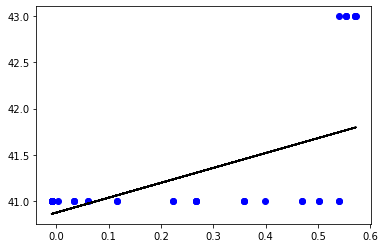

In [143]:
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')

plt.show()

plot해본 결과 다음과 같이 나타났다.

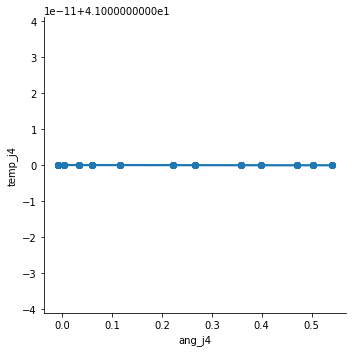

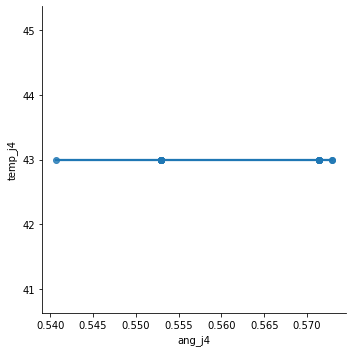

In [144]:
Line_parsing1=Line_parsing[0:131][:]
sns.lmplot(x="ang_j4",y='temp_j4',data=Line_parsing1,order=2,ci=None)
Line_parsing2=Line_parsing[132:150][:]
sns.lmplot(x="ang_j4",y='temp_j4',data=Line_parsing2,order=2,ci=None)

강의 시간에 배워본 대로 모델을 한개를 가지고 선형회귀를 진행하는게 아니라 세그먼트를 통해 나누어 모델을 두개로 나누어 계산해보는 걸 plot 한 것이다. 모델을 두개로 나누면 다음과 같이 나타 낼 수 있다.

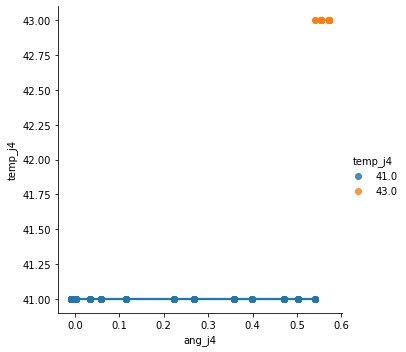

In [145]:
sns.lmplot(x="ang_j4",y='temp_j4',data=Line_parsing,order=1,ci=None,hue='temp_j4',fit_reg=True)

다음과 같이 한개의 figure 내에 세그먼트 후 두개의 모델을 plot해보면 다음과 같이 나타낼 수 있다. hue='temp_j4'를 통해 값에 따라서 나누었다.

In [146]:
Line_parsing.fillna(method='ffill',inplace=True)

x=np.array(Line_parsing['ang_j4']).reshape(-1,1)[0:131]
y=np.array(Line_parsing['temp_j4']).reshape(-1,1)[0:131]

Line_parsing.dropna(inplace=True)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

regr = LinearRegression()
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

Line_parsing.fillna(method='ffill',inplace=True)

x1=np.array(Line_parsing['ang_j4']).reshape(-1,1)[132:151]
y1=np.array(Line_parsing['temp_j4']).reshape(-1,1)[132:151]

Line_parsing.dropna(inplace=True)
X_train1, X_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size = 0.3)

regr1 = LinearRegression()
regr1.fit(X_train1, y_train1)
print(regr1.score(X_test1, y_test1))

1.0
1.0


이후 위에서 진행해보았던 방식대로 각각의 모델마다 train test 의 비율을 0.7 0.3으로 나누어 선형회귀를 진행해보고 각각의 regr.score을 확인해보았는데, 두개의 모델 모두 1로 적합한 모델이 나왔다고 분석할 수 있다. 이는 데이터 셋 특성 상 1자로 plot이 되어서 모델이 100 적합했다고 할 수 있다.

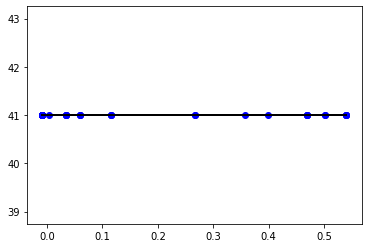

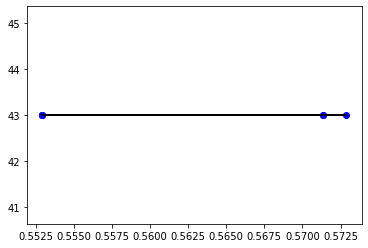

In [147]:
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')

plt.show()

y_pred1 = regr1.predict(X_test1)
plt.scatter(X_test1, y_test1, color ='b')
plt.plot(X_test1, y_pred1, color ='k')

plt.show()

회귀한 결과를 plot한 것이다. 각각 파란 점은 test 데이터를 plot 한 것이고, 1.0 적합도 답게, 일직선 상으로 회귀선이 일치해 있는 것을 볼 수 있다.

In [162]:
Line_data1=data.loc[data['motion_idx']==6706]
Line_data1

,motion_idx,tick,ang_j3,ang_j4,ang_j5,temp_j3,temp_j4,temp_j5,motion_id
945730,6706,160066981809,-0.783404,0.211953,1.52053,37.0,51.0,47.0,30
945731,6706,160066981809,-0.783404,0.211953,1.52053,37.0,51.0,47.0,30
945732,6706,160066981809,-0.783404,0.211953,1.52053,37.0,51.0,47.0,30
945733,6706,160066981809,-0.783404,0.211953,1.52053,37.0,51.0,47.0,30
945734,6706,160066981809,-0.783404,0.211953,1.52053,37.0,51.0,47.0,30
...,...,...,...,...,...,...,...,...,...
946317,6706,160066981948,-0.716084,0.428513,1.49749,40.0,51.0,47.0,30
946318,6706,160066981948,-0.716084,0.428513,1.49749,40.0,51.0,47.0,30
946319,6706,160066981948,-0.716084,0.428513,1.49749,40.0,51.0,47.0,30
946320,6706,160066981948,-0.716084,0.428513,1.49749,40.0,51.0,47.0,30


위의 과정을 똑같이 반복할 것이지만 이번에는 모션 인덱스가 6706이다.

In [163]:
Line_data1= Line_data1.drop(['ang_j4','ang_j5','temp_j4','temp_j5'],axis=1)
Line_data1

,motion_idx,tick,ang_j3,temp_j3,motion_id
945730,6706,160066981809,-0.783404,37.0,30
945731,6706,160066981809,-0.783404,37.0,30
945732,6706,160066981809,-0.783404,37.0,30
945733,6706,160066981809,-0.783404,37.0,30
945734,6706,160066981809,-0.783404,37.0,30
...,...,...,...,...,...
946317,6706,160066981948,-0.716084,40.0,30
946318,6706,160066981948,-0.716084,40.0,30
946319,6706,160066981948,-0.716084,40.0,30
946320,6706,160066981948,-0.716084,40.0,30


In [165]:
Line_parsing1=Line_data1.drop(['motion_idx','motion_id'],axis=1)
Line_parsing1


,tick,ang_j3,temp_j3
945730,160066981809,-0.783404,37.0
945731,160066981809,-0.783404,37.0
945732,160066981809,-0.783404,37.0
945733,160066981809,-0.783404,37.0
945734,160066981809,-0.783404,37.0
...,...,...,...
946317,160066981948,-0.716084,40.0
946318,160066981948,-0.716084,40.0
946319,160066981948,-0.716084,40.0
946320,160066981948,-0.716084,40.0


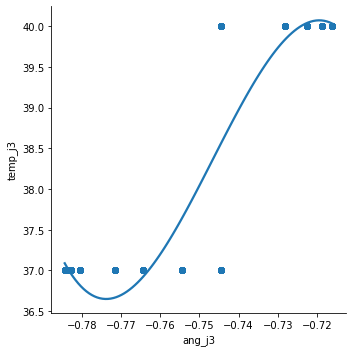

In [170]:
sns.lmplot(x='ang_j3',y='temp_j3',data=Line_parsing1,order=3,ci=None)

이번에는 3차 식으로 하여 lmplot을 그려 보았다. 1차로 그려진 직선에 비하면 훨씬 더 플랏 된 데이터 들에 대해 fit하다고 보여질 수 있다.

In [171]:
Line_parsing1.fillna(method='ffill',inplace=True)

x=np.array(Line_parsing1['ang_j3']).reshape(-1,1)
y=np.array(Line_parsing1['temp_j3']).reshape(-1,1)

Line_parsing1.dropna(inplace=True)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

regr = LinearRegression()
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.8412666930409902


트레인 , 테스트 비율을 0.7 0.3 비율로 하고, 마찬가지로 train 데이터로 선형 회귀를 진행해보고 test 데이터를 통해 회귀의 적합도를 수치로 나타내 보았는데, 이번에는 0.84 정도로 위에서 진행한 수치보다 훨씬 높게 나온 것을 알 수 있다. 이는 데이터 상에서 값들이 나눠져 있는 비율이 0.5 0.5에 가까워서  lmplot을 봐도 알겠지만,  회귀를 진행한다 할 경우 조금 더 fit하다고 할 수 있다. 따라서 수치가 이렇게 조금 더 높게 나온 것 같다.

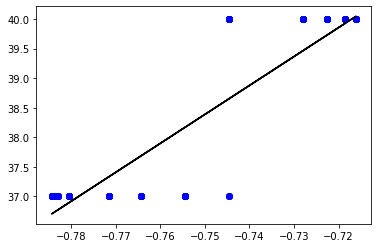

In [172]:
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')

plt.show()

테스트 데이터와, 테스트 데이터에 대한 리그레이션 예측 값을 직선으로 플랏한 결과이다.

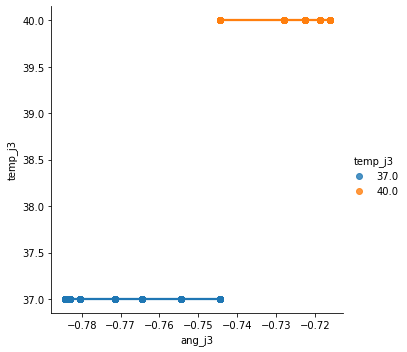

In [173]:
sns.lmplot(x="ang_j3",y='temp_j3',data=Line_parsing1,order=1,ci=None,hue='temp_j3',fit_reg=True)

이번에도 위에서와 마찬가지로 모델을 1개로 고집하지 않고, 2개로 나누어 temp가 37일때 모델 한개, 40일때 모델 한개로 나누어 구분한 것을 플랏한 결과이다.

In [174]:
Line_parsing1.fillna(method='ffill',inplace=True)

x=np.array(Line_parsing1['ang_j3']).reshape(-1,1)[0:401]
y=np.array(Line_parsing1['temp_j3']).reshape(-1,1)[0:401]

Line_parsing1.dropna(inplace=True)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

regr = LinearRegression()
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

Line_parsing1.fillna(method='ffill',inplace=True)

x1=np.array(Line_parsing1['ang_j3']).reshape(-1,1)[402:592]
y1=np.array(Line_parsing1['temp_j3']).reshape(-1,1)[402:592]

Line_parsing1.dropna(inplace=True)
X_train1, X_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size = 0.3)

regr1 = LinearRegression()
regr1.fit(X_train1, y_train1)
print(regr1.score(X_test1, y_test1))

1.0
1.0


위에서 진행했던 대로 모델 2개 각각에 선형회귀를 직접 진행해볼 경우, 데이터 셋 특성 상 일직선으로 회귀선이 그려지게 되고 적합도는 1로 
이상적인 회귀선이 역시나 그려지는 것을 확인할 수 있다.

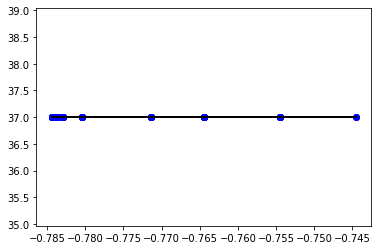

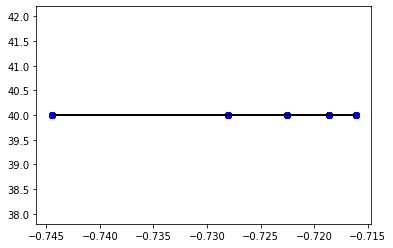

In [175]:
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')

plt.show()

y_pred1 = regr1.predict(X_test1)
plt.scatter(X_test1, y_test1, color ='b')
plt.plot(X_test1, y_pred1, color ='k')

plt.show()

위에서 진행했던 플랏과 같은 부분이기 때문에 추가적으로 따로 또 설명하지는 않겠다.

#### 5) Perform a Logistic Regression analysis on two motions by selecting one kind of temperature.

In [119]:
Line_data=data.loc[data['motion_idx']==3086]
Line_data

,motion_idx,tick,ang_j3,ang_j4,ang_j5,temp_j3,temp_j4,temp_j5,motion_id
0,3086,160049320050,-0.554516,-0.009215,1.35619,34.0,41.0,42.0,4
1,3086,160049320051,-0.554516,-0.009215,1.35619,34.0,41.0,42.0,4
2,3086,160049320053,-0.554516,-0.009215,1.35619,34.0,41.0,42.0,4
3,3086,160049320054,-0.554516,-0.009215,1.35619,34.0,41.0,42.0,4
4,3086,160049320056,-0.554516,-0.009215,1.35619,34.0,41.0,42.0,4
...,...,...,...,...,...,...,...,...,...
146,3086,160049320242,-0.911062,0.571351,1.63419,36.0,43.0,42.0,4
147,3086,160049320244,-0.911062,0.571351,1.63419,36.0,43.0,42.0,4
148,3086,160049320245,-0.919041,0.572887,1.63572,36.0,43.0,42.0,4
149,3086,160049320246,-0.919041,0.572887,1.63572,36.0,43.0,42.0,4


3086데이터를 라인데이터로 불러온다.

In [120]:
Line_data= Line_data.drop(['ang_j3','ang_j5','temp_j3','temp_j5'],axis=1)
Line_data

,motion_idx,tick,ang_j4,temp_j4,motion_id
0,3086,160049320050,-0.009215,41.0,4
1,3086,160049320051,-0.009215,41.0,4
2,3086,160049320053,-0.009215,41.0,4
3,3086,160049320054,-0.009215,41.0,4
4,3086,160049320056,-0.009215,41.0,4
...,...,...,...,...,...
146,3086,160049320242,0.571351,43.0,4
147,3086,160049320244,0.571351,43.0,4
148,3086,160049320245,0.572887,43.0,4
149,3086,160049320246,0.572887,43.0,4


In [121]:
Line_data=Line_data.drop(['motion_idx'],axis=1)
Line_data

,tick,ang_j4,temp_j4,motion_id
0,160049320050,-0.009215,41.0,4
1,160049320051,-0.009215,41.0,4
2,160049320053,-0.009215,41.0,4
3,160049320054,-0.009215,41.0,4
4,160049320056,-0.009215,41.0,4
...,...,...,...,...
146,160049320242,0.571351,43.0,4
147,160049320244,0.571351,43.0,4
148,160049320245,0.572887,43.0,4
149,160049320246,0.572887,43.0,4


In [122]:
train, test = train_test_split(Line_data, test_size=0.3, random_state=1)

# Step2) train을 다시 train/validation 으로 나누기
train, val = train_test_split(train, test_size = 0.25, random_state=1)


# 확인
train.shape, val.shape, test.shape


((78, 4), (27, 4), (46, 4))

실습때 했던 것 처럼 train/test로 나누고, train을 다시 train/validation으로 나눠 확인했다.

In [123]:
feature = ['ang_j4','tick']
target = "temp_j4"

X_train = train[feature]
y_train = train[target]

X_val = val[feature]
y_val = val[target]

X_test = test[feature]
y_test = test[target]

print("feature Matrix: ", X_train.shape, X_val.shape, X_test.shape)
print("target vector: ", y_train.shape, y_val.shape, y_test.shape)

feature Matrix:  (78, 2) (27, 2) (46, 2)
target vector:  (78,) (27,) (46,)


5) 역시도 temp를 보는 것이기 때문에, target 을 temp_j4로 하였고, feature 를 ang_4 와 tick으로 했는데, 내가 판단하기에 temp에 영향을 주는 요소는 시간인 tick과 ang_j4라고 생각했기 때문이다.

In [125]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

X_total = pd.concat([X_train, X_test])
y_total = pd.concat([y_train, y_test])

feature = ['ang_j4','tick']
target = "temp_j4"

scaler = StandardScaler()
X_total_sclaed = scaler.fit_transform(X_total)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_total_sclaed, y_total)


print("test 데이터셋 정확도")
print(model.score(X_test_scaled, y_test))
model_coef = pd.Series(model.coef_[0], feature).sort_values(ascending=False)
model_coef

test 데이터셋 정확도
0.9782608695652174


tick      2.775671
ang_j4    1.655640
dtype: float64

scaler를 통해 값들을 scaling 했다. 그 후 선형회귀와 비슷하게 진행을 해보았고, 대신 logistic Regression()을 진행해보았다. 데이터 셋 정확도를 수치로 나타내어 본 결과 훨씬 더 높은 정확도를 나타내는 것을 볼 수 있고, 이는 scaling을 통해 feature들의 영향력을 조절하고, Logistic으로 진행했기 때문이라 생각한다. 시간과 앵글 피쳐중에 어느 피쳐가 coefficient가 높을지 확인 해 본 결과, 상대적으로 비교해 보았을 때, tick 이 더 영향력이 있다고 판단된다. 이러한 이유가 나온 이유는 센서 자체를 로봇이라 생각해볼 경우, 로봇이 작동하는 시간이 길어질 수록 온도가 비례하여 증가하기 때문에 다음과 같이 tick이  temp에 대한 영향력이 크게 나올 수 있다고 생각 한다.

In [128]:
Line_data=data.loc[data['motion_idx']==6706]
Line_data

,motion_idx,tick,ang_j3,ang_j4,ang_j5,temp_j3,temp_j4,temp_j5,motion_id
945730,6706,160066981809,-0.783404,0.211953,1.52053,37.0,51.0,47.0,30
945731,6706,160066981809,-0.783404,0.211953,1.52053,37.0,51.0,47.0,30
945732,6706,160066981809,-0.783404,0.211953,1.52053,37.0,51.0,47.0,30
945733,6706,160066981809,-0.783404,0.211953,1.52053,37.0,51.0,47.0,30
945734,6706,160066981809,-0.783404,0.211953,1.52053,37.0,51.0,47.0,30
...,...,...,...,...,...,...,...,...,...
946317,6706,160066981948,-0.716084,0.428513,1.49749,40.0,51.0,47.0,30
946318,6706,160066981948,-0.716084,0.428513,1.49749,40.0,51.0,47.0,30
946319,6706,160066981948,-0.716084,0.428513,1.49749,40.0,51.0,47.0,30
946320,6706,160066981948,-0.716084,0.428513,1.49749,40.0,51.0,47.0,30


In [129]:
Line_data= Line_data.drop(['ang_j4','ang_j5','temp_j4','temp_j5'],axis=1)
Line_data

,motion_idx,tick,ang_j3,temp_j3,motion_id
945730,6706,160066981809,-0.783404,37.0,30
945731,6706,160066981809,-0.783404,37.0,30
945732,6706,160066981809,-0.783404,37.0,30
945733,6706,160066981809,-0.783404,37.0,30
945734,6706,160066981809,-0.783404,37.0,30
...,...,...,...,...,...
946317,6706,160066981948,-0.716084,40.0,30
946318,6706,160066981948,-0.716084,40.0,30
946319,6706,160066981948,-0.716084,40.0,30
946320,6706,160066981948,-0.716084,40.0,30


In [130]:
Line_data=Line_data.drop(['motion_idx'],axis=1)
Line_data

,tick,ang_j3,temp_j3,motion_id
945730,160066981809,-0.783404,37.0,30
945731,160066981809,-0.783404,37.0,30
945732,160066981809,-0.783404,37.0,30
945733,160066981809,-0.783404,37.0,30
945734,160066981809,-0.783404,37.0,30
...,...,...,...,...
946317,160066981948,-0.716084,40.0,30
946318,160066981948,-0.716084,40.0,30
946319,160066981948,-0.716084,40.0,30
946320,160066981948,-0.716084,40.0,30


In [131]:
train, test = train_test_split(Line_data, test_size=0.3, random_state=1)

# Step2) train을 다시 train/validation 으로 나누기
train, val = train_test_split(train, test_size = 0.25, random_state=1)


# 확인
train.shape, val.shape, test.shape

((310, 4), (104, 4), (178, 4))

In [132]:
feature = ['ang_j3','tick']
target = "temp_j3"

X_train = train[feature]
y_train = train[target]

X_val = val[feature]
y_val = val[target]

X_test = test[feature]
y_test = test[target]

print("feature Matrix: ", X_train.shape, X_val.shape, X_test.shape)
print("target vector: ", y_train.shape, y_val.shape, y_test.shape)

feature Matrix:  (310, 2) (104, 2) (178, 2)
target vector:  (310,) (104,) (178,)


In [133]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

X_total = pd.concat([X_train, X_test])
y_total = pd.concat([y_train, y_test])

feature = ['ang_j3','tick']
target = "temp_j3"

scaler = StandardScaler()
X_total_sclaed = scaler.fit_transform(X_total)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_total_sclaed, y_total)


print("test 데이터셋 정확도")
print(model.score(X_test_scaled, y_test))
model_coef = pd.Series(model.coef_[0], feature).sort_values(ascending=False)
model_coef

test 데이터셋 정확도
0.9887640449438202


ang_j3    3.764865
tick      2.915814
dtype: float64

6706인덱스를 활용해서 진행해보았다. 위의 과정들은 중복되는 과정이니 따로 추가적인 분석을 하지 않겠다. 이역시 마찬가지로, 데이터 셋 정확도를 구해보았는데 0.988로 매우 높게 나오는 것을 볼 수 있었다. 3086 모션 인덱스로 진행했을 때보다 더 높게 측정됨을 알 수 있는데 이 역시 모션 인덱스 내의 인덱스 갯수의 차이로 인해 6706 데이터가 더 충분했기 때문에 더 fit 하게 나왔다고 할 수 있다. 그리고 여기서 coefficient를 구해봤을 때는 tick 보단 ang_j3가 더 높게 나온 것을 볼 수 있는데, ㅇ3086 인덱스 같은 경우 주어진 csv 파일 중 가장 tick이 낮은, 시간상으로 가장 이른 시간대의 동작이라 할 수 있었다. 따라서 초기에는 ang로 인한 온도 보다 시간에 따라서 온도의 변화가 더 강하다 할 수있다. 하지만 어느정도 시간이 지나고 6706 모션 인덱스 때에서는 시간에 따른 온도 변화보다 ang 움직임에 따른 온도의 변화가 더 강하다고 할 수 있고, angle과 temp의 상관관계를 로봇이라 생각해보면 6706 인덱스에서 일어나는 각의 변화가 3086에서 일어나는 각의 변화보다 더 커서 온도의 증가에 더 영향을 주지 않았나 분석 할 수 있을 것이다.

Problem 2. Result Analysis

1) compare the results of problem 1-1) with the results of Problem 1-2)

1-1은 K-means clustering 1-2) DBSCAN 으로 비계층적 군집 분석에 속한다. 비계층적 군집분석은 계층을 두지않고 그룹화를 할 유사도 측정 방식에 따라 최적의 그룹을 계속적으로 찾아나가는 방식으로, 결과를 분석해보았을때  1-1 같은 경우 initial centroid의 위치가 final centroid의 위치에 영향을 많이 미친다. 또한 K=2 이기 때문에 2가지의 군집으로 fix되지만 DBSCAN 같은 경우 eps 와 min_sample에 따라 같은 데이터 셋이여도 클러스터의 갯수가 다르게 나올 수 있고, 군집의 형태가 다르게 나올 수 있다. 
내가 구현한 1-2 방법 같은 경우 클러스터 마다 요소의 갯수를 비슷하게 담았다. 하지만 min_sample에 값, 그리고 eps 의 값에 따라서 클러스터의 갯수가 민감하게 반응할 수 있고 현재 데이터 셋을 보았을 때 motion은 4 와 30으로 2개의 군집이라고 생각 할 수 있기 때문에, K-means clustering을 통해서 K=2라 두고 clustering을 진행해 보는게 조금 더 이 데이터 셋에는 적합하지 않나 생각이 든다. 하지만 데이터를 세세하게 분류하여 내가 한 것 처럼 군집마다 요소를 비슷하게 담고 싶거나 혹은 클러스터의 갯수를 늘려보고 싶다면 DBSCAn 방식이 좋을 거 같다고 생각된다. 구현하기가 비교적 간단하고, 새로운 데이터의 클러스터를 찾을 때 계산량이 적다는 것이 1-1의 장점이라 생각한다.
1-2 는 군집 수를 미리 정할 필요가 없고, 노이즈에 강하다는 점이 장점이라고 생각한다.


2) compare the results of problem 1-3) with the results of Problem 1-4)

kNN 의 결과와 Linear regression의 결과를 비교해보고자 한다. 일단 먼저 1-4 같은 경우 3086 6706의 모션 아이디를 가져와서 선형회귀를 해보았다. 각각 앵글 4, 앵글 3에 대해 비교를 해보았고 1-3에서 모션 아이디 4의 앵글 4, 모션아이디 30의 앵글 3의 KNN 결과를 가져와보면,

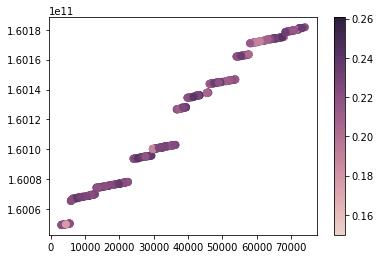

In [202]:
from sklearn.model_selection import train_test_split

X = real4[["motion_idx","tick"]]
X = X.values
y = real4["ang_j4"]
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=5)

knn_model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error
from math import sqrt
train_preds = knn_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse

test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
rmse

import seaborn as sns
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(X_test[:, 0], X_test[:, 1], c=test_preds, s=50, cmap=cmap)
f.colorbar(points)
plt.show()


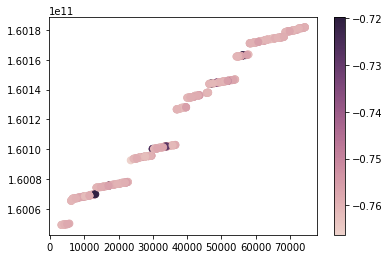

In [203]:
from sklearn.model_selection import train_test_split

X = real30[["motion_idx","tick"]]
X = X.values
y = real30["ang_j3"]
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=4)

knn_model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error
from math import sqrt
train_preds = knn_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse

test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
rmse

import seaborn as sns
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(X_test[:, 0], X_test[:, 1], c=test_preds, s=50, cmap=cmap)
f.colorbar(points)
plt.show()

다음과 같다. 또한 1-4 선형 회귀에서 결과를 따져 보았을 때 3086의 경우 0.37 6706 같은 경우 0.8 정도로 크게 차이가 났는데, KNN의 데이터 플롯의 색에서 확인할 수 있듯이 모션 4의 앵글 4 같은 경우는 색이 비교적 다양하지만 모션 30의 앵글 3같은 경우는 색이 연한색이 주를 이룬다. 이뜻은 모션 30의 앵글 3같은 경우 데이터들의 크기 차이가 많이 나지 않아 비슷한 라벨로 분류된 것이다. 따라서 선형회귀를 통해 모델을 예측했을 때도 데이터들의 크기가 많이 차이 나지 않는 모델 30의 앵글 3의 선형회귀 결과가 높게 나오는 것은 자명한 결과이다. 데이터가 같은 라벨에 분류 되었다는 것은 크기의 차이가 x의 변화에 따라서도 크게 다르지 않고 상대적으로 일정하다라고 할 수 있으니 모델을 예측 정확도가 높아진다고 할 수있다. 추가적으로 선형회귀에서는 독립 변수를 온도로 두고 했는데, KNN의 x 같은 경우는 tick 이다. 가정할 수 있는 부분은 tick-> angle-> temp로 영향을 줄 수 있지 않나 생각 해볼 수 있다.

3) compare the results of problem 1-3) with the results of Problem 1-5)

knn과 로지스틱 회귀를 비교할때 선형회귀와의 차이점이라고는 feature를 들 수 있다. 1-5 로지스틱 회귀를 진행했을 때 feature 로 angle 뿐 아니라 tick 도 temp에 영향을 주게 하였고, 선형회귀때보다 로지스틱 회귀의 
정확도가 더 올라간 것을 확인한 것을 알 수 있는데, 선형회귀와 로지스틱 회귀와의 결과 차이는 밑에서 자세히 다루겠다. 결과적으로 1-3 과 1-5를 비교했을 때 파악 할 수 있는 점은 
angle tick temp가 서로 독립적으로 영향을 주고 영향을 받는 관계가 아니라, 서로 영향을 주고 받는 관계애 있다는 점을 파악 할 수 있을 것 같다.

4) compare the results of problem 1-4) with the results of Problem 1-5)

마지막으로 선형 회귀와 로지스틱 회귀에 대한 결과 분석이다. 먼저 선형회귀 같은 경우 정확도가 높게 나오지 않았다. 위에 언급했듯이 0.37 0.8 정도로 나왔는데 로지스틱 같은 경우는 0.98 0.99 정도로 매우 정확하게 나왔다 일단 선형 회귀와 로지스틱의 차이가 더 나는 부분은 선형 함수보다 로지스틱 함수가 훨씬더 유연한 곡선의 형태를 띄고 있기 때문에, 게단식의 데이터 값 모양에서 직선적인 선형회귀 형태보다는 로지스틱한 함수가 좀 더 fit 하게 데이터 셋들에 들어 맞았기 때문이라고 생각한다. 또한 1-4 같은 경우에는 feature 가 angle로 1개 밖에 없었지만 로지스틱 회귀 같은 경우에는 tick 또한 같이 영향을 주었는데 coef를 계산해본 결과, tick이 angle보다 더욱 더 temp에 강한 영향을 미치는 것도 보여주었고, 이에 따라 더 영향력이 큰 feature가 추가됨에 따라 정확도 자체도 올라갈 수 밖에 없었을 것이다. 하지만 선형회귀라고 장점이 없는 것은 아니엿다. 모델을 하나만 사용하는 것이 아니라 위에서 진행해본 것처럼 temp 데이터 값에 따라 모델을 분할하고 그에따라 선형 회귀를 진행해본다면, 데이터 셋의 특성 상 일자로 일정하게 찍혀있어서 정확도를 검사해보았을 때 1.0이 나오는 것을 확인할 수있었다. 따라서 데이터의 모양에 따라서 유연하게 회귀 방식을 채택하여 모델을 구축한다면 더욱 더 구간 별로 높은 정확도를 얻어낼 수 있을 것이다.